In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import pandas as pd
import numpy as np

In [89]:
import scipy.stats as stats

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [93]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [94]:
df = pd.read_csv('/content/drive/MyDrive/day30-function-transformer/train.csv',usecols=['Age','Fare','Survived'])
df.shape

(891, 3)

In [95]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [96]:
# Checking for NaN values in each column
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


Removing NaN values

In [97]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-97-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [98]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


Train and Test Split

In [99]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(712, 2)
(712,)
(179, 2)
(179,)


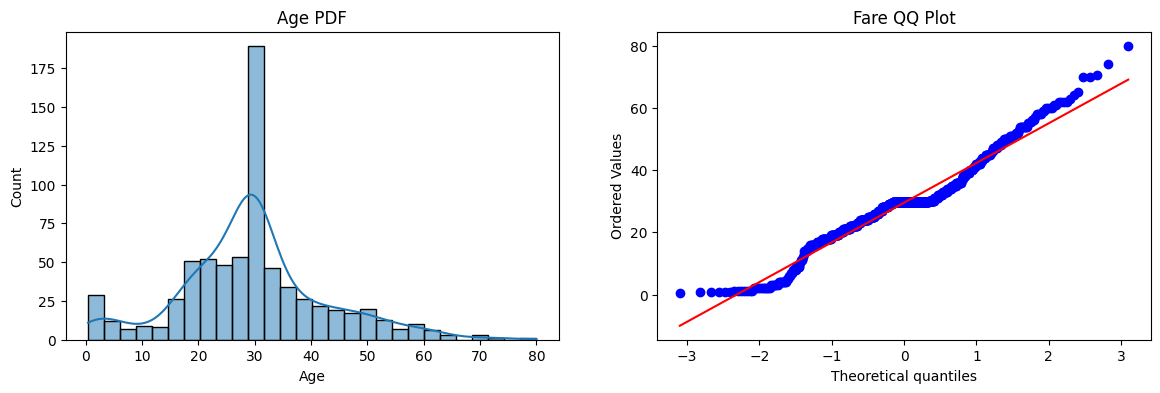

In [102]:
# Age PDF (Probability Density Function)
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')


plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

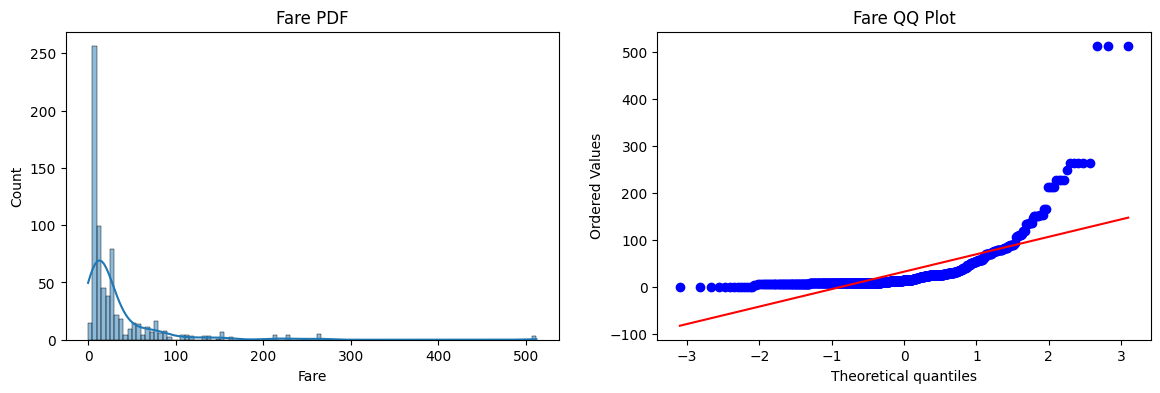

In [103]:
# 'Fare' PDF (Probability Density Function)
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')


plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [104]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [105]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


Function Transformer Applied (log trans)

In [106]:
trf = FunctionTransformer(func=np.log1p)

In [107]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [108]:
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [109]:
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

In [110]:
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6759776536312849


Checking Model's performance with Cross Validation

In [111]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))


LR 0.678027465667915
DT 0.6644444444444444


PDF & QQ plots after log transformation

For `Age` Column

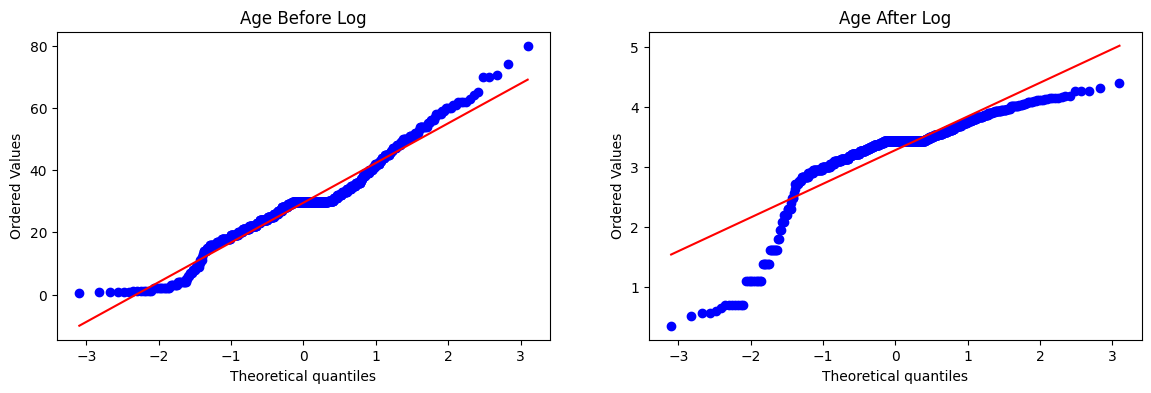

In [112]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

For `Fare` column

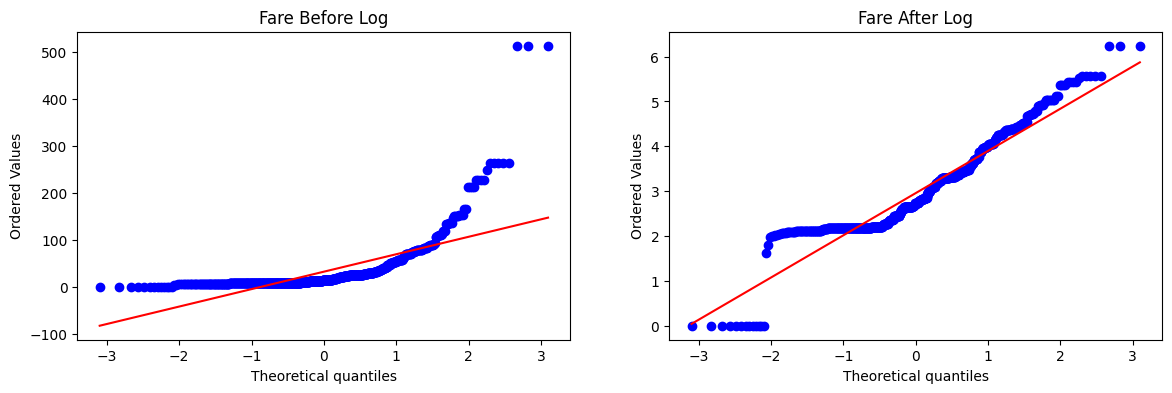

In [113]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

Now, we're applying log trans on `Fare` column only

In [114]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [115]:
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)


y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed2)


print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.4022346368715084
Accuracy DT 0.6759776536312849


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


With Cross-Validaiton

In [116]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6610861423220974


Other Transformations like `log`, `square`/`sqrt` & `reciprocal`

Improved Code

In [121]:
def apply_transform(transform, transform_name):
    print(f"Applying {transform_name} transformation")

    X = df[['Age', 'Fare']]  # Selecting 'Age' and 'Fare'
    y = df['Survived']  # Selecting target variable 'Survived'

    transformations = ColumnTransformer([
        (transform_name.lower(), FunctionTransformer(transform, validate=True), ['Age', 'Fare'])
    ], remainder='passthrough')

    X_trans = transformations.fit_transform(X)

    clf = LogisticRegression()
    accuracy = np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=5))  # Adjusted CV to 5 due to small data
    print("Accuracy:", accuracy)


    # Plots
    plt.figure(figsize=(14, 6))

    # Age QQ plot before transformation
    plt.subplot(221)
    stats.probplot(X['Age'], dist="norm", plot=plt)
    plt.title(f'Age Before {transform_name} Transform')

    # Age QQ plot after transformation
    plt.subplot(222)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title(f'Age After {transform_name} Transform')

    # Fare QQ plot before transformation
    plt.subplot(223)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title(f'Fare Before {transform_name} Transform')

    # Fare QQ plot after transformation
    plt.subplot(224)
    stats.probplot(X_trans[:, 1], dist="norm", plot=plt)
    plt.title(f'Fare After {transform_name} Transform')

    plt.show()


Applying Log transformation
Accuracy: 0.6780114242671521


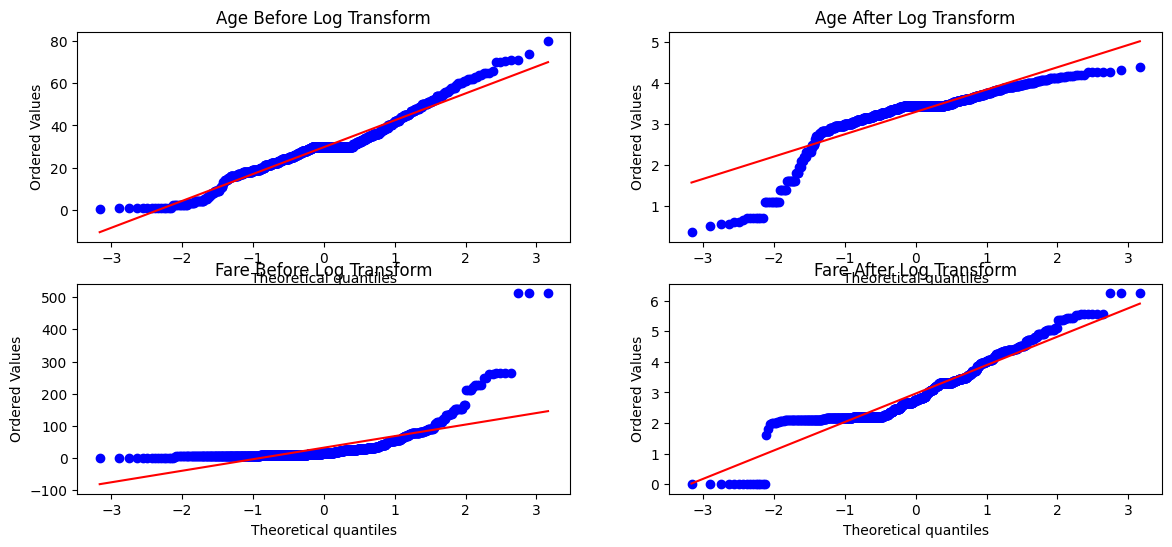

Applying Sqrt transformation
Accuracy: 0.6735107651748165


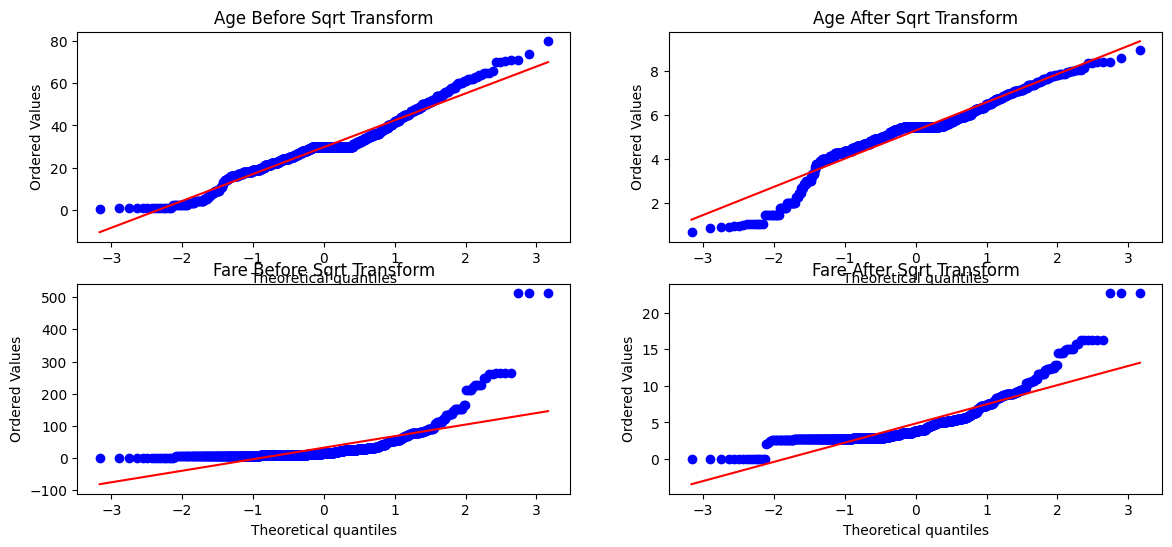

Applying Reciprocal transformation
Accuracy: 0.617287050404871


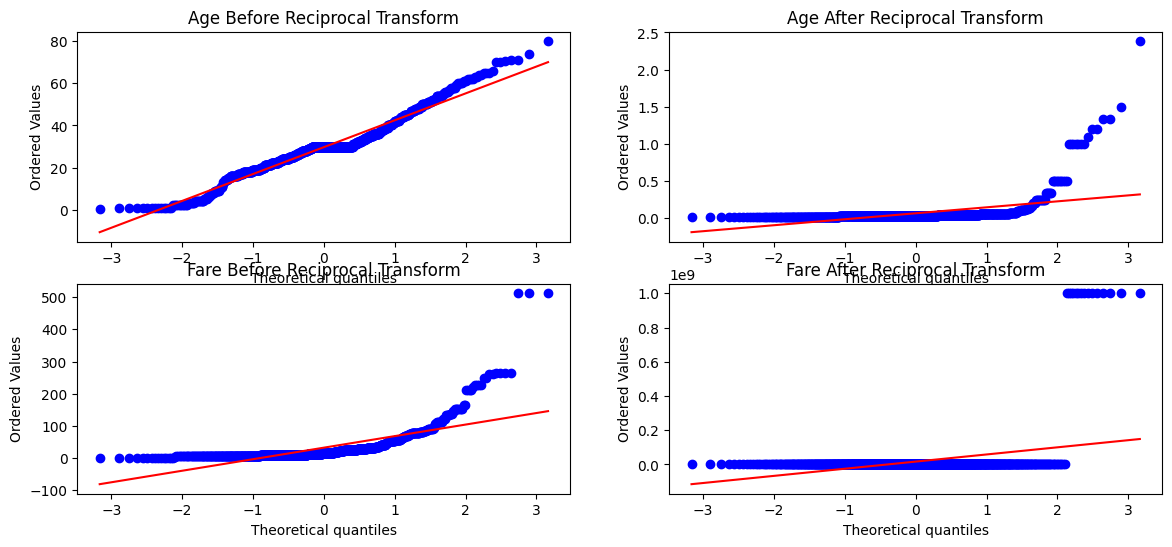

Applying Square transformation
Accuracy: 0.6453706609754566


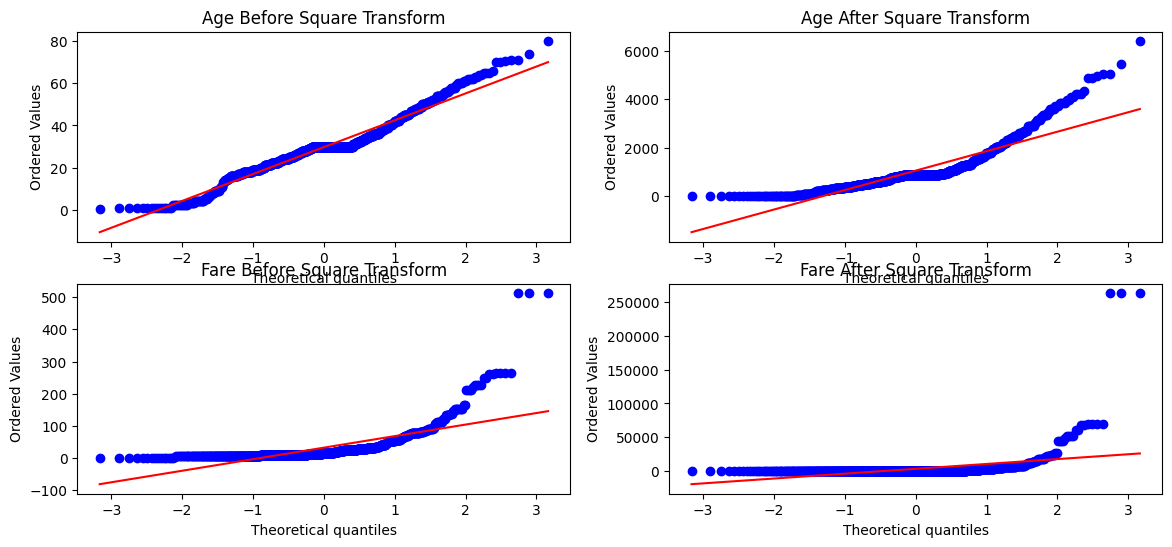

In [122]:
apply_transform(np.log1p, "Log")
apply_transform(np.sqrt, "Sqrt")
apply_transform(lambda x: 1 / (x + 1e-9), "Reciprocal")
apply_transform(np.square, "Square")